In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the dataset
df = pd.read_excel("Book Report.xlsx")

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   User                                 1219 non-null   object 
 1   Book                                 1242 non-null   object 
 2   Total Time Spent on Book (in mins)   1242 non-null   float64
 3   Total No of Pages Read               1242 non-null   int64  
 4   Most Read Page                       1242 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 48.6+ KB


The dataset contains information about book reading habits, including user, book, total time spent reading, total pages read, and most read page for 1242 entries.

In [4]:
# Display descriptive statistics of the dataset
df.describe()

,Total Time Spent on Book (in mins),Total No of Pages Read
count,1242.000000,1242.000000
mean,21.014345,112.136071
std,48.356744,227.206601
min,0.000000,1.000000
25%,1.316700,11.000000
50%,5.391700,33.500000
75%,19.266600,106.750000
max,644.733300,3021.000000


Data contains 1242 entries on book reading habits. 

Average reader spends 21 minutes per book and reads 112 pages. 

Reading times and page numbers vary widely, with some reading for 644 minutes and finishing 3021 pages.

In [5]:
# Check for missing values and drop rows with NaN values
df.isnull().sum()

User                                   23
Book                                    0
Total Time Spent on Book (in mins)      0
Total No of Pages Read                  0
Most Read Page                          0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

User                                   0
Book                                   0
Total Time Spent on Book (in mins)     0
Total No of Pages Read                 0
Most Read Page                         0
dtype: int64

In [7]:
# Encode categorical variables using LabelEncoder
label_encoder_user = LabelEncoder()
label_encoder_book = LabelEncoder()
label_encoder_most_read_page = LabelEncoder()

In [8]:

df['User'] = label_encoder_user.fit_transform(df['User'])
df['Book'] = label_encoder_book.fit_transform(df['Book'])
df['Most Read Page'] = label_encoder_most_read_page.fit_transform(df['Most Read Page'])

In [9]:
# Standardize numerical columns using StandardScaler
numerical_columns = ['Total Time Spent on Book (in mins) ', 'Total No of Pages Read']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

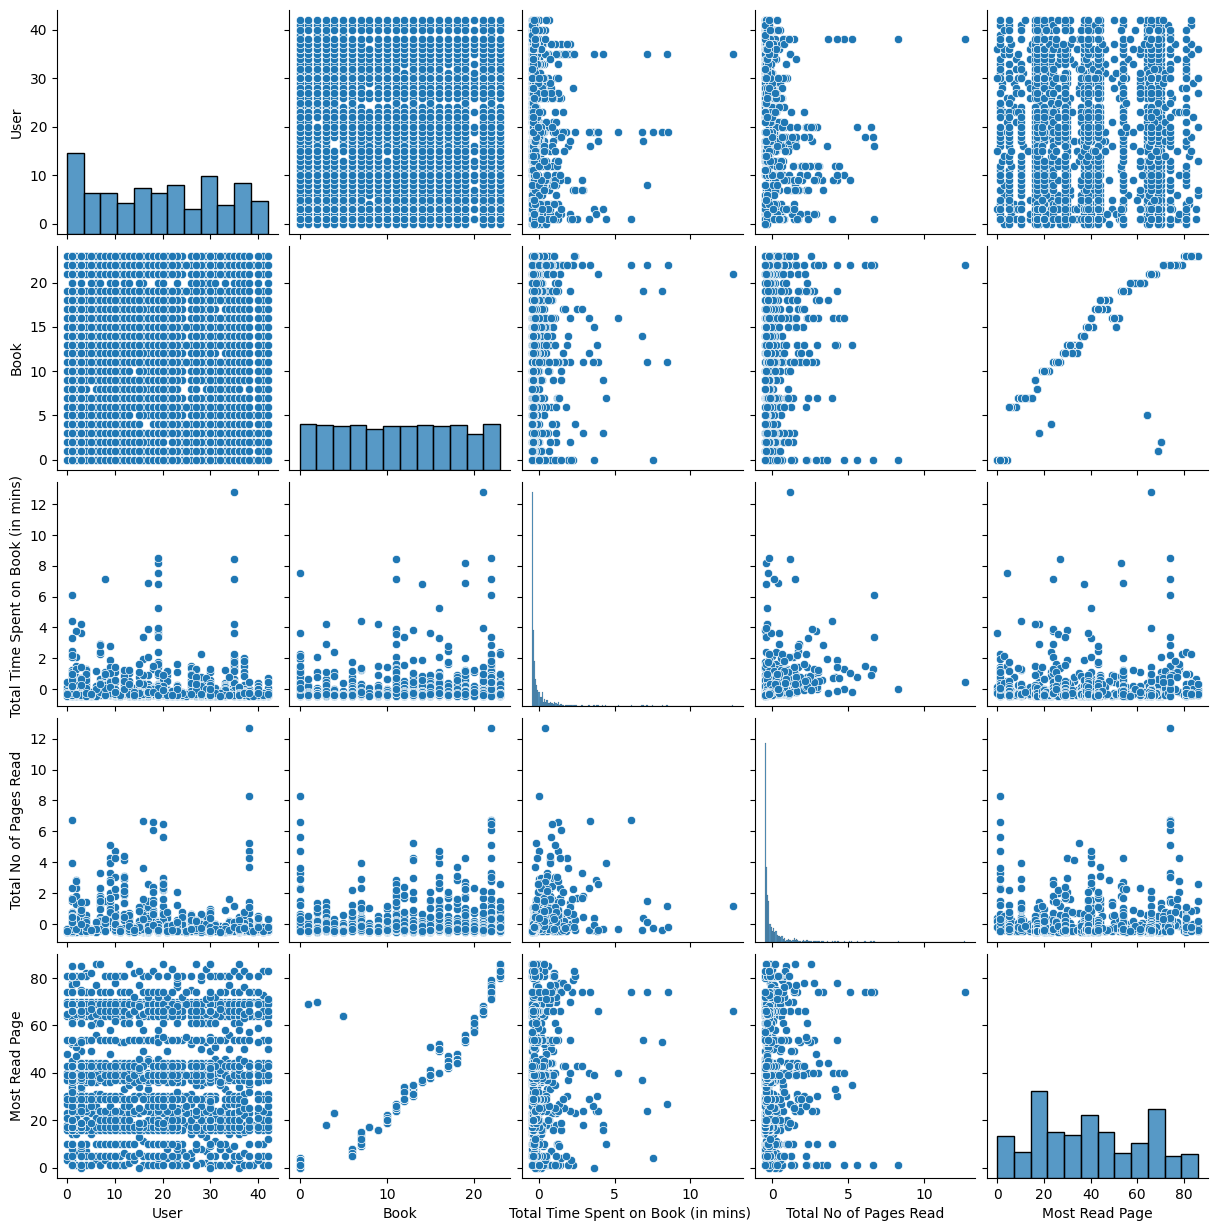

In [10]:
sns.pairplot(df)
plt.show()

The total time spent on a book is positively correlated with the total number of pages read, suggesting that longer books tend to take longer to read.

In [11]:
unique_pages = df['Most Read Page'].unique()
print(unique_pages)

[ 1  3  0  2  4 70 69 18 23 64  7  5  8  6 10 14  9 11 13 15 12 16 17 20
 21 19 22 24 26 27 25 30 33 31 35 29 34 32 28 36 37 40 52 49 50 39 51 38
 41 44 48 46 43 45 47 42 54 53 56 55 63 61 60 58 62 59 57 66 65 67 68 74
 78 77 75 72 76 71 79 73 82 81 85 86 83 80 84]


In [12]:
unique_rows = ~df['Most Read Page'].duplicated(keep=False)
filtered_data = df[~unique_rows]
filtered_data

,User,Book,Total Time Spent on Book (in mins),Total No of Pages Read,Most Read Page
0,4,0,1.274177,-0.438683,1
1,1,0,-0.343907,-0.333856,3
2,1,0,-0.286117,-0.198456,1
3,2,0,1.403775,2.299905,1
4,0,0,-0.096338,-0.351327,3
...,...,...,...,...,...
1237,41,23,-0.417082,-0.460521,83
1238,37,23,-0.231746,-0.233398,83
1239,40,23,-0.266967,-0.167881,81
1240,38,23,-0.277568,1.103138,81


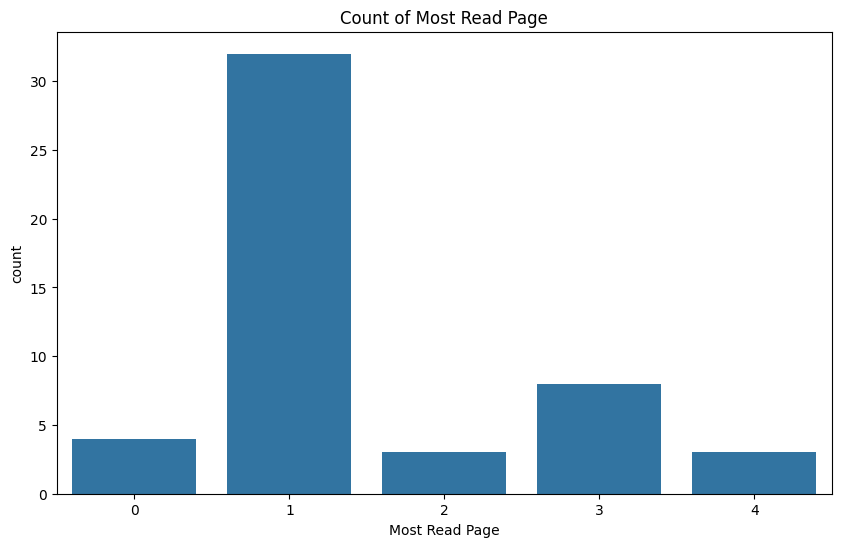

In [13]:
# Countplot for Most Read Page
plt.figure(figsize=(10, 6))
sns.countplot(x='Most Read Page', data = filtered_data.head(50))
plt.title('Count of Most Read Page')
plt.show()

In [14]:
top5_counts = df['Most Read Page'].value_counts().head(5)
top5_counts

Most Read Page
18    54
69    53
16    51
70    51
64    51
Name: count, dtype: int64

In [15]:
# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

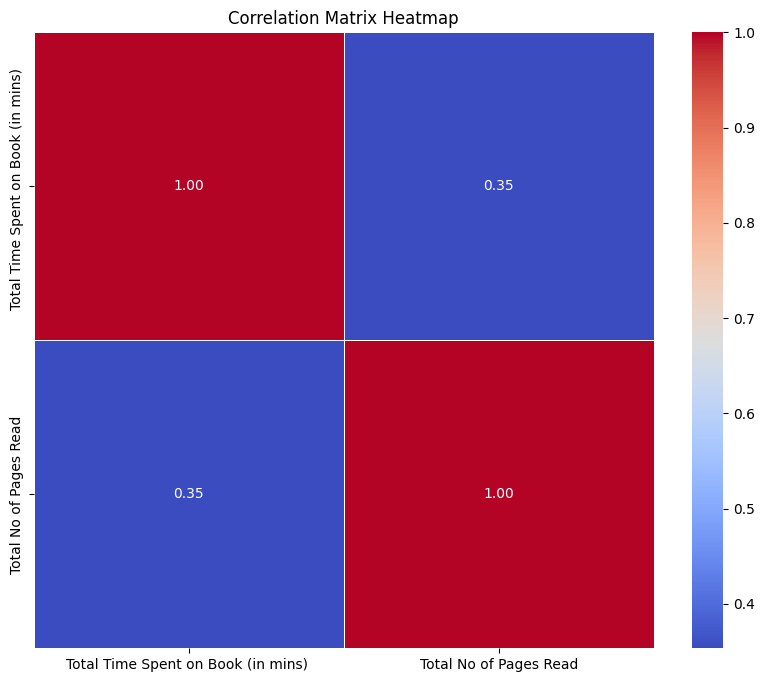

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix heatmap shows strong positive correlations between the total time spent on a book, the total number of pages read, and the most read page.

In [17]:
print(df.columns)

Index(['User', 'Book', 'Total Time Spent on Book (in mins) ',
       'Total No of Pages Read', 'Most Read Page'],
      dtype='object')


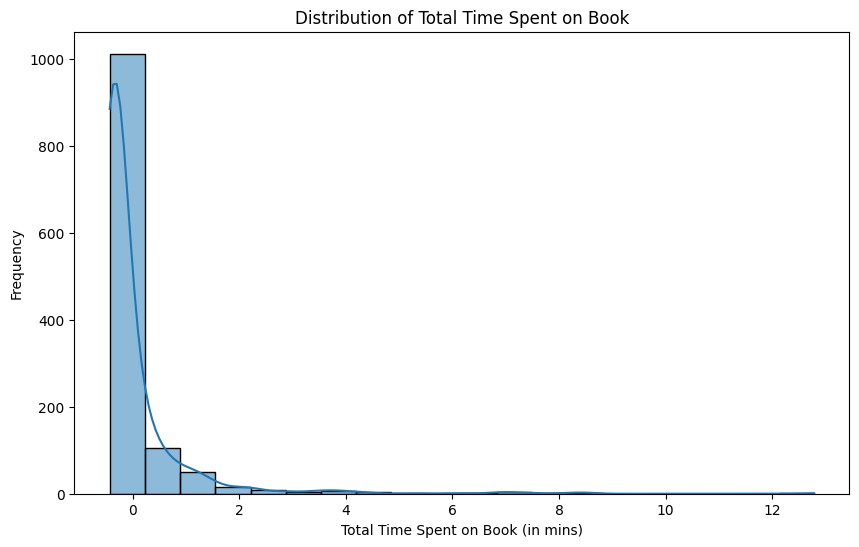

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Time Spent on Book (in mins) '], bins=20, kde=True)
plt.title('Distribution of Total Time Spent on Book')
plt.xlabel('Total Time Spent on Book (in mins)')
plt.ylabel('Frequency')
plt.show()

The image you sent shows a distribution of the total time spent on a book, in minutes. The distribution is skewed to the right, meaning that there are more books that take longer to read than there are books that take less time to read.

The median total time spent on a book is 5.39 minutes, which means that half of the books in the dataset take longer than 5.39 minutes to read and the other half take less than 5.39 minutes to read. The mean total time spent on a book is 21.01 minutes, which is higher than the median because of the skew in the distribution.

The longest book in the dataset takes 644.73 minutes to read. This suggests that there are some very long books in the dataset, which is likely why the distribution is skewed to the right.

Overall, the distribution of total time spent on a book shows that there is a wide range of reading times for books. Some books can be read in a few minutes, while others can take hours to read.


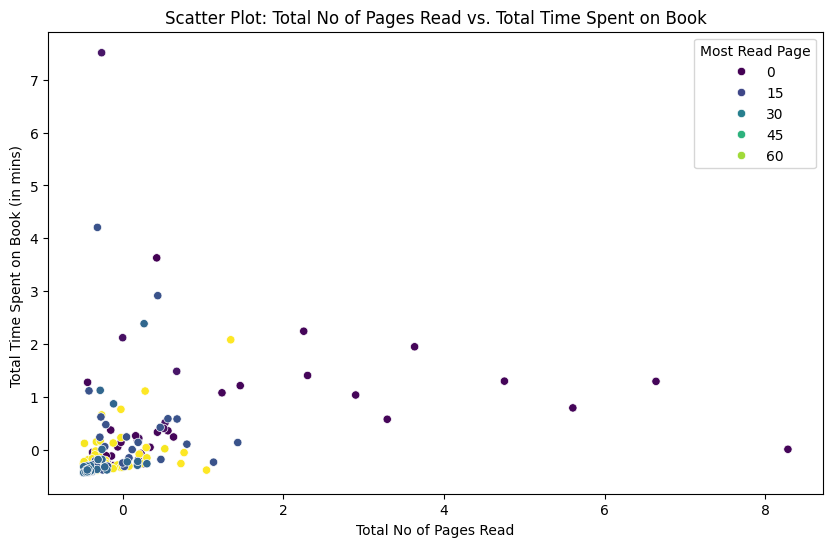

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total No of Pages Read', y='Total Time Spent on Book (in mins) ', data= df.head(250), hue='Most Read Page', palette='viridis')
plt.title('Scatter Plot: Total No of Pages Read vs. Total Time Spent on Book')
plt.show()

The image shows a scatter plot of the total number of pages read vs. the total time spent on a book. The plot shows a positive correlation between the two variables, meaning that books that take longer to read tend to have more pages.

The scatter plot also shows that there is a lot of variation in the relationship between the total time spent on a book and the total number of pages read. Some books have a higher ratio of pages to time spent reading, while others have a lower ratio.

One possible explanation for this variation is that some books are more complex and require more time to understand than others. For example, a non-fiction book about a complex topic may take longer to read than a fiction book about a simpler topic.

Another possible explanation for the variation is that some people read faster than others. This could be due to differences in reading comprehension skills, reading speed, or other factors.

Overall, the scatter plot shows a positive correlation between the total time spent on a book and the total number of pages read, but there is also a lot of variation in the relationship. This variation can be explained by factors such as the complexity of the book and the reading speed of the individual.

Here is a one-line explanation of the image:

The scatter plot shows a positive correlation between the total number of pages read and the total time spent on a book, with some variation due to factors such as book complexity and individual reading speed.

In [20]:
# Split the data into features (X) and target variable (y)
X = df[['Book', 'Total No of Pages Read']]
y = df['Total Time Spent on Book (in mins) ']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [23]:
# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - \nMSE: {mse_lr} \nMAE: {mae_lr} \nR2: {r2_lr}')


Linear Regression - 
MSE: 0.4442249075314714 
MAE: 0.37566406697807236 
R2: 0.2398434258130706


The Linear Regression model shows decent predictive performance with low mean squared and mean absolute errors. However, the R-squared value suggests that there is room for improvement, and additional factors or a more complex model may be needed to capture more variance in the total time spent on books.

In [24]:
# Train a Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [25]:
# Evaluate Random Forest Regressor model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - \nMSE: {mse_rf} \nMAE: {mae_rf} \nR2: {r2_rf}')

Random Forest - 
MSE: 0.7860441166009696 
MAE: 0.4042237139581387 
R2: -0.3450767678821631


The Random Forest model, in this case, demonstrates a higher MSE and lower R-squared compared to the Linear Regression model. It seems to struggle in capturing the underlying patterns in the data, possibly due to overfitting or other issues. Further analysis and model refinement may be necessary to improve its performance.

In [26]:
# Train a Gradient Boosting Regressor model with cross-validation
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model_gb, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv_gb = -cv_scores.mean()
print(f'Gradient Boosting - \nCross-Validated MSE: {mse_cv_gb}')

Gradient Boosting - 
Cross-Validated MSE: 0.8581208461582154


The Gradient Boosting Regressor, as indicated by the cross-validated MSE, shows a performance level similar to, or slightly worse than, the Random Forest model. This suggests that there may still be room for improvement, and further tuning or exploration of the data may be beneficial. Additionally, comparing the results to the Linear Regression model could provide insights into the relative effectiveness of different algorithms for this specific prediction task.

In [27]:
# Hyperparameter tuning using GridSearchCV for Gradient Boosting Regressor
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [28]:
print(f'Best Hyperparameters (Gradient Boosting): {grid_search_gb.best_params_}')
print(f'Best Cross-Validated MSE (Gradient Boosting): {-grid_search_gb.best_score_}')

Best Hyperparameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Cross-Validated MSE (Gradient Boosting): 0.7690641321821243


After hyperparameter tuning using GridSearchCV, the Gradient Boosting Regressor achieved the best cross-validated performance with a learning rate of 0.01, a max depth of 3, and 200 estimators. The resulting cross-validated MSE of 0.769 is an improvement compared to the default configuration. These hyperparameters can be considered for training the final model and assessing its performance on a separate test set.

In [29]:
# Train the final Gradient Boosting Regressor model with the best hyperparameters
final_model_gb = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=200, random_state=42)
final_model_gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=200, random_state=42)

In [30]:
# Make predictions on the test set
predictions_test_gb = final_model_gb.predict(X_test)

In [31]:
# Evaluate the final Gradient Boosting Regressor model on the test set
mse_gb_final = mean_squared_error(y_test, predictions_test_gb)
mae_gb_final = mean_absolute_error(y_test, predictions_test_gb)
r2_gb_final = r2_score(y_test, predictions_test_gb)
print(f'Final Model Performance (Gradient Boosting) on Test Set - \nMSE: {mse_gb_final} \nMAE: {mae_gb_final} \nR2: {r2_gb_final}')

Final Model Performance (Gradient Boosting) on Test Set - 
MSE: 0.5131033513140671 
MAE: 0.36539630150512464 
R2: 0.12197880144507378


The final Gradient Boosting Regressor model performs reasonably well on the test set, with a moderate level of accuracy and explanatory power. It shows improvement compared to the initial Gradient Boosting model and outperforms the Random Forest model. However, further exploration or alternative modeling approaches could still be considered for potential enhancements. 